Ouverture et description du fichier

In [1]:
import pandas as pd

# Chargement des fichiers
test_input_train = pd.read_csv("train_input.csv")
test_input_real = pd.read_csv("test_input.csv")
train_output = pd.read_csv("train_output.csv")  # Ajout de la ligne manquante

# Fusion des inputs
train_input = pd.concat([test_input_train, test_input_real], ignore_index=True)

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_5356\2428514472.py:4: DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types. Specify dtype option on import or set low_memory=False.
  test_input_train = pd.read_csv("train_input.csv")
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_5356\2428514472.py:5: DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types. Specify dtype option on import or set low_memory=False.
  test_input_real = pd.read_csv("test_input.csv")


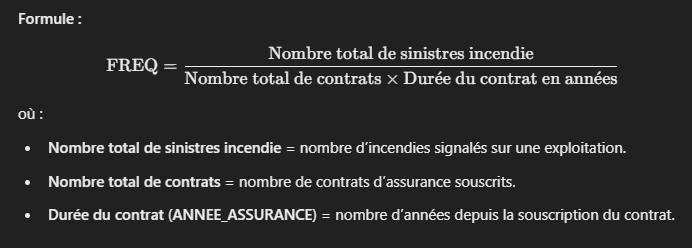

Nettoyage du fichier

In [2]:
import pandas as pd

# Afficher le nombre de lignes et de colonnes de chaque fichier
print(f"📊 Nombre de lignes dans train_input : {train_input.shape[0]}")
print(f"📂 Nombre de colonnes dans train_input : {train_input.shape[1]}")
print(f"📂 Colonnes de train_input :\n{list(train_input.columns)}\n")

print(f"📊 Nombre de lignes dans train_output : {train_output.shape[0]}")
print(f"📂 Nombre de colonnes dans train_output : {train_output.shape[1]}")
print(f"📂 Colonnes de train_output :\n{list(train_output.columns)}\n")

# Fusionner avec un LEFT JOIN sur train_input
df = train_input.merge(train_output, on="ID", how="left")

# Afficher le nombre de lignes et colonnes après fusion
print(f"📊 Nombre de lignes après fusion : {df.shape[0]}")
print(f"📂 Nombre de colonnes après fusion : {df.shape[1]}")
print(f"📂 Colonnes après fusion :\n{list(df.columns)}\n")

# Identifier les colonnes avec plus de 75% de valeurs manquantes
"""
missing_percent = df.isnull().sum() / df.shape[0] * 100
cols_to_drop = missing_percent[missing_percent > 75].index
print(f"🚨 Colonnes supprimées (plus de 75% de NaN) : {list(cols_to_drop)}\n")

# Supprimer ces colonnes
df.drop(columns=cols_to_drop, inplace=True)
"""

# Afficher le nombre de lignes et de colonnes après suppression des colonnes à forte nullité
print(f"✅ Nombre de lignes finales : {df.shape[0]}")
print(f"✅ Nombre de colonnes après suppression des colonnes vides : {df.shape[1]}")
print(f"✅ Colonnes restantes :\n{list(df.columns)}\n")

📊 Nombre de lignes dans train_input : 479462
📂 Nombre de colonnes dans train_input : 374
📂 Colonnes de train_input :
['ID', 'ACTIVIT2', 'VOCATION', 'TYPERS', 'ANCIENNETE', 'ADOSS', 'CARACT1', 'CARACT2', 'CARACT3', 'INDEM1', 'DUREE_REQANEUF', 'CARACT4', 'CARACT5', 'TYPBAT1', 'INDEM2', 'TYPBAT2', 'FRCH1', 'FRCH2', 'DEROG1', 'DEROG2', 'DEROG3', 'DEROG4', 'DEROG5', 'DEROG6', 'DEROG7', 'DEROG8', 'DEROG9', 'DEROG10', 'DEROG11', 'DEROG12', 'DEROG13', 'DEROG14', 'DEROG15', 'DEROG16', 'TAILLE1', 'TAILLE2', 'CA1', 'CA2', 'CA3', 'KAPITAL1', 'KAPITAL2', 'KAPITAL3', 'KAPITAL4', 'KAPITAL5', 'KAPITAL6', 'KAPITAL7', 'KAPITAL8', 'KAPITAL9', 'KAPITAL10', 'KAPITAL11', 'KAPITAL12', 'KAPITAL13', 'KAPITAL14', 'KAPITAL15', 'KAPITAL16', 'KAPITAL17', 'KAPITAL18', 'KAPITAL19', 'KAPITAL20', 'KAPITAL21', 'KAPITAL22', 'KAPITAL23', 'KAPITAL24', 'KAPITAL25', 'KAPITAL26', 'KAPITAL27', 'KAPITAL28', 'KAPITAL29', 'KAPITAL30', 'KAPITAL31', 'KAPITAL32', 'KAPITAL33', 'KAPITAL34', 'KAPITAL35', 'KAPITAL36', 'KAPITAL37', 'KAP

In [3]:
df["ZONE"] = df["ZONE"].astype(str).str.strip().astype("category")

Definition des X et Y

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Affichage des colonnes initiales
print(f"📂 Colonnes initiales :\n{list(df.columns)}\n")

# Vérifier et renommer la colonne ANNEE_ASSURANCE si elle est en double
if 'ANNEE_ASSURANCE_x' in df.columns and 'ANNEE_ASSURANCE_y' in df.columns:
    df.drop(columns=['ANNEE_ASSURANCE_y'], inplace=True)
    df.rename(columns={'ANNEE_ASSURANCE_x': 'ANNEE_ASSURANCE'}, inplace=True)

print("✅ Colonnes après correction :", df.columns.tolist())

# Définir les colonnes cibles et explicatives
columns_to_drop = ['FREQ', 'CM', 'CHARGE']
columns_to_keep = [col for col in df.columns if col not in columns_to_drop]

# Définir X (features) et y (targets)
X = df[columns_to_keep].copy()
X = X.drop(columns=['FREQ', 'CM'], errors='ignore')  # Supprimer FREQ et CM s'ils sont présents
y = df[['FREQ', 'CM']].copy()

print(f"✅ Taille de X : {X.shape}")
print(f"✅ Taille de y : {y.shape}")

# Conversion des colonnes en nombres si possible, sinon en category
for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col], errors='raise')  # Convertir en numérique si possible
    except:
        X[col] = X[col].astype(str).str.strip().astype('category')  # Sinon, convertir en category

# Vérification des types après conversion
print("✅ Types de colonnes après conversion :")
print(X.dtypes.value_counts())

# 🔹 Séparer les colonnes à NE PAS normaliser
cols_to_exclude = ['ID', 'ANNEE_ASSURANCE']  # Ne pas normaliser ces colonnes
excluded_cols = X[cols_to_exclude].copy()  # Garder ces colonnes séparées

X = X.drop(columns=cols_to_exclude)  # Retirer temporairement pour normalisation

# 🔹 Normalisation des features numériques (sauf ID et ANNEE_ASSURANCE)
#######################################################################
num_cols = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# 🔹 Réintégrer les colonnes non normalisées
X = pd.concat([X, excluded_cols], axis=1)

print("✅ Données normalisées (sauf `ID` et `ANNEE_ASSURANCE`), et variables catégoriques conservées.")

# 🔹 Vérification finale
print(f"✅ Vérification après preprocessing : X -> {X.shape}, y -> {y.shape}")

📂 Colonnes initiales :
['ID', 'ACTIVIT2', 'VOCATION', 'TYPERS', 'ANCIENNETE', 'ADOSS', 'CARACT1', 'CARACT2', 'CARACT3', 'INDEM1', 'DUREE_REQANEUF', 'CARACT4', 'CARACT5', 'TYPBAT1', 'INDEM2', 'TYPBAT2', 'FRCH1', 'FRCH2', 'DEROG1', 'DEROG2', 'DEROG3', 'DEROG4', 'DEROG5', 'DEROG6', 'DEROG7', 'DEROG8', 'DEROG9', 'DEROG10', 'DEROG11', 'DEROG12', 'DEROG13', 'DEROG14', 'DEROG15', 'DEROG16', 'TAILLE1', 'TAILLE2', 'CA1', 'CA2', 'CA3', 'KAPITAL1', 'KAPITAL2', 'KAPITAL3', 'KAPITAL4', 'KAPITAL5', 'KAPITAL6', 'KAPITAL7', 'KAPITAL8', 'KAPITAL9', 'KAPITAL10', 'KAPITAL11', 'KAPITAL12', 'KAPITAL13', 'KAPITAL14', 'KAPITAL15', 'KAPITAL16', 'KAPITAL17', 'KAPITAL18', 'KAPITAL19', 'KAPITAL20', 'KAPITAL21', 'KAPITAL22', 'KAPITAL23', 'KAPITAL24', 'KAPITAL25', 'KAPITAL26', 'KAPITAL27', 'KAPITAL28', 'KAPITAL29', 'KAPITAL30', 'KAPITAL31', 'KAPITAL32', 'KAPITAL33', 'KAPITAL34', 'KAPITAL35', 'KAPITAL36', 'KAPITAL37', 'KAPITAL38', 'KAPITAL39', 'KAPITAL40', 'KAPITAL41', 'KAPITAL42', 'KAPITAL43', 'SURFACE1', 'SURFACE

In [5]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Définition de la ligne pour l'entraînement
n_train = 383611 - 1

# Séparation des données
X_train = X.iloc[:n_train, :].copy()
y_train_freq = y['FREQ'].iloc[:n_train].copy()
y_train_cm = y['CM'].iloc[:n_train].copy()
X_test = X.iloc[n_train:, :].copy()

# Vérifier et exclure les colonnes cibles de X_train et X_test
columns_to_remove = ['FREQ', 'CM', 'CHARGE']  # S'assurer que ces colonnes ne sont pas dans les features
X_train = X_train.drop(columns=[col for col in columns_to_remove if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in columns_to_remove if col in X_test.columns])

# ✅ Vérification après nettoyage
print(f"📂 Colonnes de X_train après suppression : {X_train.columns}")
print(X_train.head())
print(f"📂 Colonnes de X_test après suppression : {X_test.columns}")
print(X_test.head())

📂 Colonnes de X_train après suppression : Index(['ACTIVIT2', 'VOCATION', 'TYPERS', 'ANCIENNETE', 'ADOSS', 'CARACT1',
       'CARACT2', 'CARACT3', 'INDEM1', 'DUREE_REQANEUF',
       ...
       'NBJRR100_MSOM_A', 'RR_VOR_MM_A', 'RR_VOR_MMAX_A', 'RRAB_VOR_MM_A',
       'RRAB_VOR_MMAX_A', 'ESPINSEE', 'AN_EXERC', 'ZONE', 'ID',
       'ANNEE_ASSURANCE'],
      dtype='object', length=374)
  ACTIVIT2 VOCATION    TYPERS  ANCIENNETE ADOSS CARACT1  CARACT2 CARACT3  \
0     ACT1     VOC6 -1.409862   -1.354177     N       N      NaN     nan   
1     ACT1     VOC6 -1.409862   -1.354177     N       N      NaN     nan   
2     ACT1     VOC6 -1.409862   -0.831007     N       R      NaN     nan   
3     ACT1     VOC6  0.709289   -1.354177     N       N      NaN     nan   
4     ACT1     VOC6  0.709289   -1.092592     N       N      NaN     nan   

  INDEM1  DUREE_REQANEUF  ... NBJRR100_MSOM_A  RR_VOR_MM_A RR_VOR_MMAX_A  \
0      N             NaN  ...             nan          nan           nan   
1     

Pour déterminer la FREQ :

In [6]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import warnings
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Séparation du jeu de données
n_train = 383610
X_train = X.iloc[:n_train].copy()
X_test = X.iloc[n_train:].copy()
y_train_freq = y['FREQ'].iloc[:n_train].copy()

# Suppression des colonnes cibles dans les features
X_train.drop(columns=['FREQ', 'CM', 'CHARGE'], inplace=True, errors='ignore')
X_test.drop(columns=['FREQ', 'CM', 'CHARGE'], inplace=True, errors='ignore')

# Échantillonnage pour accélérer l'optimisation
sample_idx = np.random.choice(X_train.index, size=50000, replace=False)
X_sample = X_train.loc[sample_idx]
y_sample = y_train_freq.loc[sample_idx]

# Fonction objectif Optuna
@ignore_warnings(category=ConvergenceWarning)
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'max_depth': trial.suggest_int('max_depth', 2, 4),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'random_state': 42,
        'enable_categorical': True,
        'objective': 'reg:squarederror',
        'base_score': 0,
        'n_jobs': -1
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, X_sample, y_sample, cv=2, scoring='r2', n_jobs=-1)
    return np.mean(score)

# Lancement rapide de l’optimisation
print("🚀 Optimisation Optuna (version rapide) en cours...")
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, show_progress_bar=True)

# Entraînement final sur toutes les données
best_params = study.best_params
print(f"\n✅ Meilleurs hyperparamètres : {best_params}")

best_model = XGBRegressor(**best_params, enable_categorical=True, objective='reg:squarederror', random_state=42, base_score=0, n_jobs=-1)
print("🚀 Entraînement final avec tous les exemples...")
best_model.fit(X_train, y_train_freq)

# Prédiction
y_pred_freq = best_model.predict(X_test)
X_test_pred = pd.DataFrame(index=X_test.index)
X_test_pred["FREQ"] = y_pred_freq

# Évaluation sur l'entraînement complet
y_pred_train = best_model.predict(X_train)
mae = mean_absolute_error(y_train_freq, y_pred_train)
mse = mean_squared_error(y_train_freq, y_pred_train)
r2 = r2_score(y_train_freq, y_pred_train)

print("\n📈 Résultats sur l'ensemble d'entraînement :")
print(f"  ➤ MAE : {mae:.4f}")
print(f"  ➤ MSE : {mse:.4f}")
print(f"  ➤ R²  : {r2:.4f}")

# Exemple des prédictions
print("🧮 Taille de X :", X.shape[0])
print("\n🔮 10 premières lignes prédites de FREQ (test) :")
print(X_test_pred.reset_index(drop=True).head(10))

[I 2025-04-30 17:54:01,842] A new study created in memory with name: no-name-d8b6571e-6746-4a06-a83e-794f2630abf3


🚀 Optimisation Optuna (version rapide) en cours...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-04-30 17:54:07,093] Trial 0 finished with value: -0.0024711710103644258 and parameters: {'n_estimators': 95, 'max_depth': 2, 'learning_rate': 0.017341444770260415, 'subsample': 0.8603869796560558, 'colsample_bytree': 0.7440103963565102, 'reg_lambda': 1.3739278307848353, 'reg_alpha': 1.5898740702541185}. Best is trial 0 with value: -0.0024711710103644258.
[I 2025-04-30 17:54:13,811] Trial 1 finished with value: -0.08445536286188449 and parameters: {'n_estimators': 127, 'max_depth': 4, 'learning_rate': 0.07826697281391899, 'subsample': 0.9764785372521354, 'colsample_bytree': 0.9077124561758345, 'reg_lambda': 1.5401889453538709, 'reg_alpha': 3.351948369946886}. Best is trial 0 with value: -0.0024711710103644258.
[I 2025-04-30 17:54:17,505] Trial 2 finished with value: -0.0029364250052641427 and parameters: {'n_estimators': 81, 'max_depth': 2, 'learning_rate': 0.047029713997605256, 'subsample': 0.9148153409668478, 'colsample_bytree': 0.7466757505960345, 'reg_lambda': 2.547843545106

Pour déterminer CM :

In [7]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Séparation dynamique
n_train = 383610
X_train = X.iloc[:n_train].copy()
X_test = X.iloc[n_train:].copy()
y_train_cm = y['CM'].iloc[:n_train].copy()

# Suppression des colonnes cibles
X_train.drop(columns=['FREQ', 'CM', 'CHARGE'], inplace=True, errors='ignore')
X_test.drop(columns=['FREQ', 'CM', 'CHARGE'], inplace=True, errors='ignore')

# Échantillonnage pour aller plus vite
sample_size = min(50000, len(X_train))
sample_idx = np.random.choice(X_train.index, size=sample_size, replace=False)
X_sample = X_train.loc[sample_idx]
y_sample = y_train_cm.loc[sample_idx]

# Fonction objectif rapide
@ignore_warnings(category=ConvergenceWarning)
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'max_depth': trial.suggest_int('max_depth', 2, 5),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'enable_categorical': True,
        'objective': 'reg:squarederror',
        'random_state': 42,
        'n_jobs': -1
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, X_sample, y_sample, cv=2, scoring='r2', n_jobs=-1)
    return np.mean(score)

# Optuna rapide
print("🔍 Optimisation rapide d'Optuna pour CM...")
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, show_progress_bar=True)

# Meilleurs hyperparamètres
best_params = study.best_params
print(f"\n✅ Meilleurs hyperparamètres CM : {best_params}")

# Entraînement final complet
best_model = XGBRegressor(**best_params, enable_categorical=True, objective='reg:squarederror', random_state=42, n_jobs=-1)
print("🚀 Entraînement final du modèle CM...")
best_model.fit(X_train, y_train_cm)

# Prédiction
y_pred_cm = best_model.predict(X_test)
X_test_pred = pd.DataFrame(index=X_test.index)
X_test_pred["CM"] = y_pred_cm

# Évaluation sur le train
y_pred_train = best_model.predict(X_train)
mae = mean_absolute_error(y_train_cm, y_pred_train)
mse = mean_squared_error(y_train_cm, y_pred_train)
r2 = r2_score(y_train_cm, y_pred_train)

print("\n Résultats du modèle CM sur l'entraînement :")
print(f"  ➤ MAE : {mae:.4f}")
print(f"  ➤ MSE : {mse:.4f}")
print(f"  ➤ R²  : {r2:.4f}")

[I 2025-04-30 17:56:23,447] A new study created in memory with name: no-name-7c80d7eb-0be6-4d73-bef2-8dc077303585


🔍 Optimisation rapide d'Optuna pour CM...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-04-30 17:56:29,110] Trial 0 finished with value: -0.215257412909436 and parameters: {'n_estimators': 137, 'max_depth': 4, 'learning_rate': 0.06299166340576177, 'subsample': 0.7250701427744775, 'colsample_bytree': 0.9101235600164727, 'reg_lambda': 3.6945358426033637, 'reg_alpha': 2.4646258413202022}. Best is trial 0 with value: -0.215257412909436.
[I 2025-04-30 17:56:32,369] Trial 1 finished with value: -0.07893607069677167 and parameters: {'n_estimators': 78, 'max_depth': 3, 'learning_rate': 0.053920746892673586, 'subsample': 0.717923872363676, 'colsample_bytree': 0.7869919278665314, 'reg_lambda': 4.4961660918780275, 'reg_alpha': 1.2094724012679876}. Best is trial 1 with value: -0.07893607069677167.
[I 2025-04-30 17:56:36,025] Trial 2 finished with value: -0.11646007148369086 and parameters: {'n_estimators': 70, 'max_depth': 5, 'learning_rate': 0.022228273756525155, 'subsample': 0.9458592197704121, 'colsample_bytree': 0.7166483071431585, 'reg_lambda': 1.5818422611994376, 'reg_a

Calcul final de prédiction

In [8]:
# Création d'un DataFrame vide avec le bon index
X_test_pred = pd.DataFrame(index=X_test.index)
X_test_pred["FREQ"] = y_pred_freq
X_test_pred["CM"] = y_pred_cm

# Tu peux ensuite recalculer CHARGE :
X_test_pred["ANNEE_ASSURANCE"] = X.loc[X_test.index, "ANNEE_ASSURANCE"]
X_test_pred["CHARGE"] = X_test_pred["FREQ"] * X_test_pred["CM"] * X_test_pred["ANNEE_ASSURANCE"]

# Et éventuellement récupérer l'ID :
X_test_pred["ID"] = X.loc[X_test.index, "ID"]

# Affichage final
print(X_test_pred[["ID", "FREQ", "CM", "ANNEE_ASSURANCE", "CHARGE"]].head())

            ID      FREQ          CM  ANNEE_ASSURANCE    CHARGE
383610  383611  0.011123  127.289185         0.813699  1.152039
383611  383612  0.007585   98.882256         1.000000  0.749994
383612  383613  0.006137   98.882256         0.586301  0.355791
383613  383614  0.005347  139.298096         1.000000  0.744853
383614  383615  0.006996  179.866348         0.753425  0.948061


In [9]:
# Calcul de CHARGE
X_test_pred["CHARGE"] = X_test_pred['FREQ'] * X_test_pred['CM'] * X_test_pred['ANNEE_ASSURANCE']

# Sauvegarde des résultats
X_test_pred[["ID", "FREQ", "CM", "ANNEE_ASSURANCE", "CHARGE"]].to_csv("submission1.csv", index=False, sep=",")
print("✅ Fichier 'submission1.csv' enregistré avec succès.")

✅ Fichier 'submission1.csv' enregistré avec succès.


2 modèles grid search -> Ici on intègre la FREQ à l'entrainement pour retrouver CM 

In [10]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Séparation des données
n_train = 383610
X_base = X.copy()
X_train_base = X_base.iloc[:n_train].copy()
X_test_base = X_base.iloc[n_train:].copy()
y_train_freq = y['FREQ'].iloc[:n_train].copy()
y_train_cm = y['CM'].iloc[:n_train].copy()

# Suppression des cibles dans les features
for df in [X_train_base, X_test_base]:
    df.drop(columns=['FREQ', 'CM', 'CHARGE'], inplace=True, errors='ignore')

# Fonction d’optimisation avec train_test_split (plus rapide que cross_val_score)
@ignore_warnings(category=ConvergenceWarning)
def optimize_xgb_with_optuna(X_train, y_train, label, timeout=900):
    sample_size = min(50000, len(X_train))
    sample_idx = np.random.choice(X_train.index, size=sample_size, replace=False)
    X_sample = X_train.loc[sample_idx]
    y_sample = y_train.loc[sample_idx]

    X_sub, X_val, y_sub, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 70, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 7),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
            'subsample': trial.suggest_float('subsample', 0.7, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 3.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
            'enable_categorical': True,
            'objective': 'reg:squarederror',
            'random_state': 42,
            'n_jobs': -1
        }
        model = XGBRegressor(**params)
        model.fit(X_sub, y_sub)
        preds = model.predict(X_val)
        return r2_score(y_val, preds)

    print(f"\n🔍 Optimisation Optuna pour {label}...")
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, timeout=timeout, show_progress_bar=True)

    best_params = study.best_params
    print(f"✅ Meilleurs paramètres pour {label} : {best_params}")
    final_model = XGBRegressor(**best_params, enable_categorical=True, objective='reg:squarederror', random_state=42, n_jobs=-1)
    final_model.fit(X_train, y_train)
    return final_model

# 1. Entraînement du modèle FREQ (10-15 min max)
model_freq = optimize_xgb_with_optuna(X_train_base, y_train_freq, "FREQ", timeout=900)
X_train_freq = X_train_base.copy()
X_test_freq = X_test_base.copy()
X_train_freq['FREQ'] = model_freq.predict(X_train_base)
X_test_freq['FREQ'] = model_freq.predict(X_test_base)

# 2. Entraînement du modèle CM (avec FREQ prédite) (10-15 min aussi)
model_cm = optimize_xgb_with_optuna(X_train_freq, y_train_cm, "CM", timeout=900)
X_test_freq['CM'] = model_cm.predict(X_test_freq)

# 3. Calcul de la CHARGE
X_test_freq["CHARGE"] = X_test_freq["FREQ"] * X_test_freq["CM"] * X_test_freq["ANNEE_ASSURANCE"]

# Export final
X_test_freq[["ID", "FREQ", "CM", "ANNEE_ASSURANCE", "CHARGE"]].to_csv("submission2.csv", index=False)
print("\n✅ Fichier 'submission2.csv' exporté avec succès !")

# Évaluation sur l'entraînement
y_pred_train_freq = model_freq.predict(X_train_base)
mae_freq = mean_absolute_error(y_train_freq, y_pred_train_freq)
mse_freq = mean_squared_error(y_train_freq, y_pred_train_freq)
r2_freq = r2_score(y_train_freq, y_pred_train_freq)

y_pred_train_cm = model_cm.predict(X_train_freq)
mae_cm = mean_absolute_error(y_train_cm, y_pred_train_cm)
mse_cm = mean_squared_error(y_train_cm, y_pred_train_cm)
r2_cm = r2_score(y_train_cm, y_pred_train_cm)

print("\n📈 Résultats sur l'ensemble d'entraînement :")
print(f"🔹 FREQ - MAE : {mae_freq:.4f}, MSE : {mse_freq:.4f}, R² : {r2_freq:.4f}")
print(f"🔹 CM   - MAE : {mae_cm:.4f}, MSE : {mse_cm:.4f}, R² : {r2_cm:.4f}")

[I 2025-04-30 17:58:43,174] A new study created in memory with name: no-name-78eca47c-4ef8-4efb-aadb-e3395d4b7086



🔍 Optimisation Optuna pour FREQ...


   0%|          | 00:00/15:00

[I 2025-04-30 17:58:45,043] Trial 0 finished with value: -0.05827321778894179 and parameters: {'n_estimators': 78, 'max_depth': 4, 'learning_rate': 0.03801200613095797, 'subsample': 0.8797691262524155, 'colsample_bytree': 0.8076053151395138, 'reg_lambda': 1.1017225455067527, 'reg_alpha': 0.9899120721054067}. Best is trial 0 with value: -0.05827321778894179.
[I 2025-04-30 17:58:48,024] Trial 1 finished with value: -0.12581604857878892 and parameters: {'n_estimators': 89, 'max_depth': 6, 'learning_rate': 0.1058204788255775, 'subsample': 0.9178399746095054, 'colsample_bytree': 0.6106623102379888, 'reg_lambda': 2.1226152518590693, 'reg_alpha': 0.03247620347419777}. Best is trial 0 with value: -0.05827321778894179.
[I 2025-04-30 17:58:50,640] Trial 2 finished with value: -0.11360795697962756 and parameters: {'n_estimators': 110, 'max_depth': 5, 'learning_rate': 0.19233903848210185, 'subsample': 0.754691648765851, 'colsample_bytree': 0.7292820345955607, 'reg_lambda': 2.632398413889716, 'reg_

KeyboardInterrupt: 

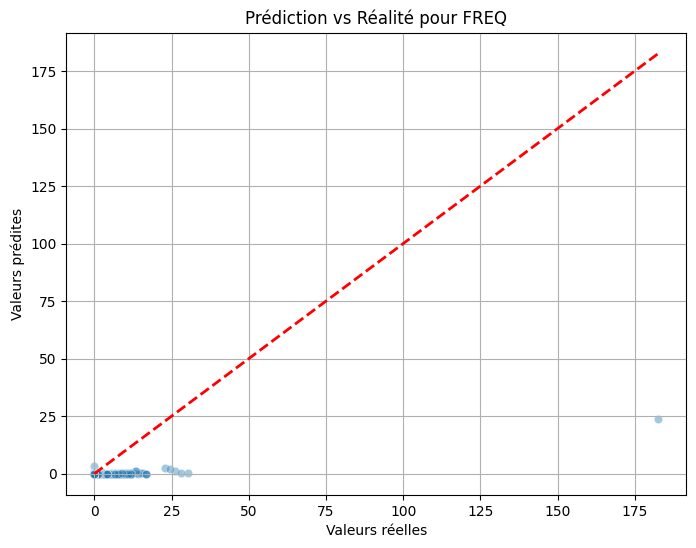

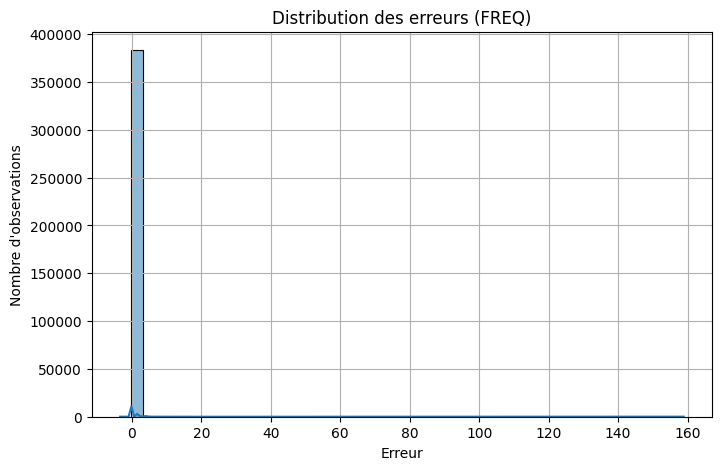

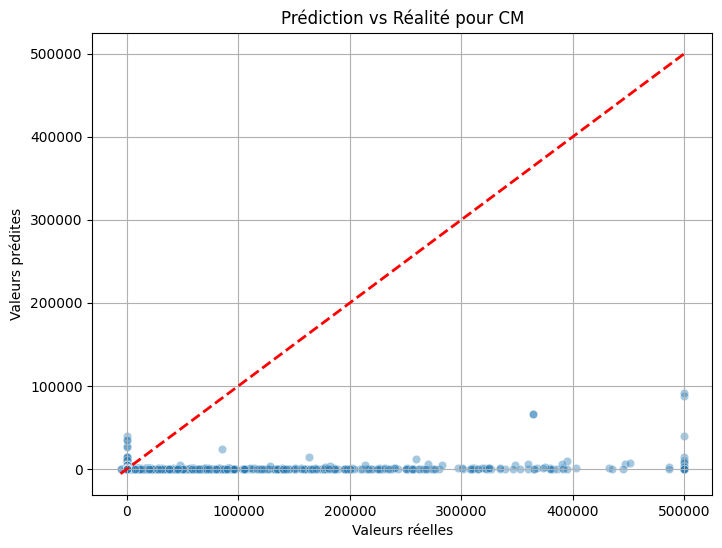

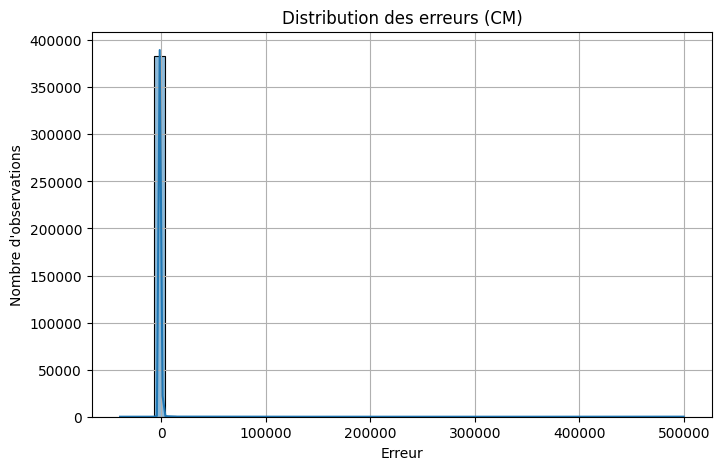

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_3696\324478461.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




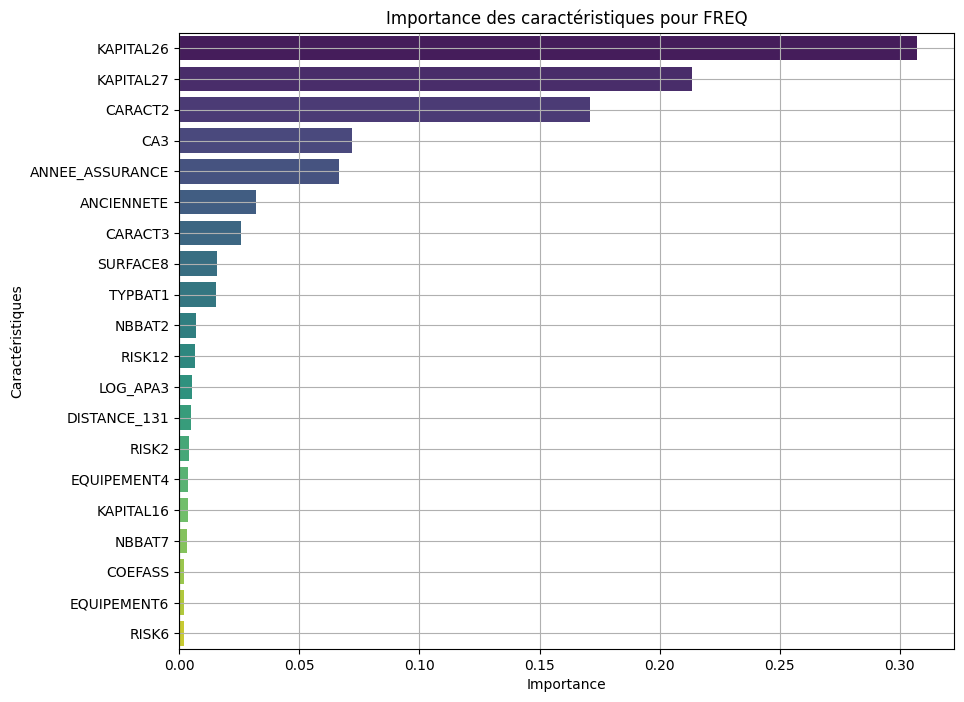

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_3696\324478461.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




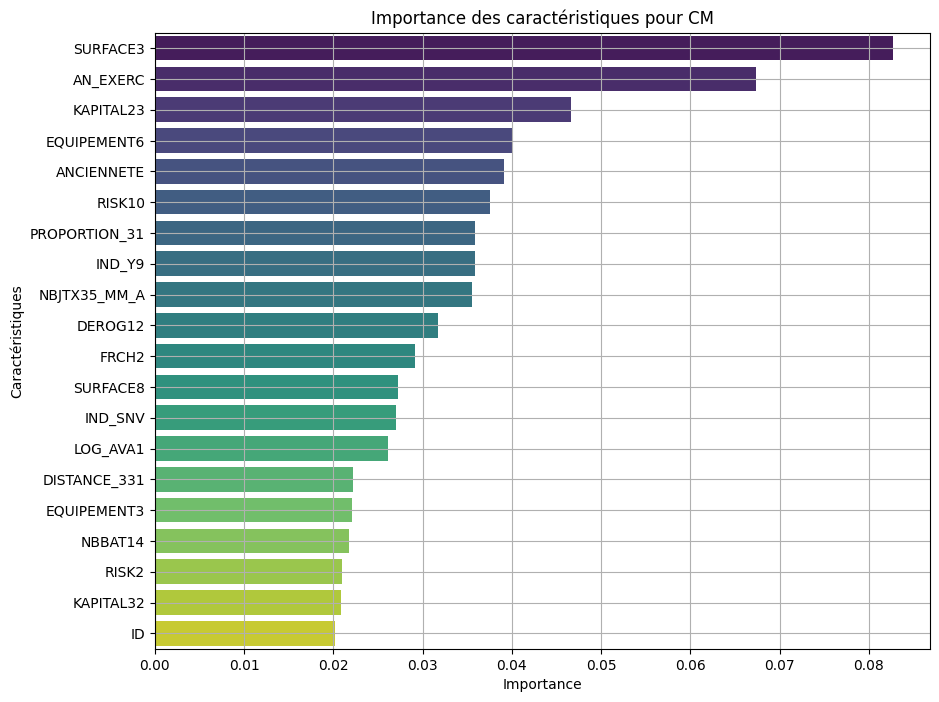

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphiques pour visualiser les résultats sur l'ensemble d'entraînement

# Fonction pour tracer les résultats
def plot_results(y_true, y_pred, title, xlabel="Valeurs réelles", ylabel="Valeurs prédites"):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.4)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Résultats pour FREQ
plot_results(y_train_freq, y_pred_train_freq, "Prédiction vs Réalité pour FREQ")

# Distribution des erreurs FREQ
plt.figure(figsize=(8, 5))
sns.histplot(y_train_freq - y_pred_train_freq, bins=50, kde=True)
plt.title("Distribution des erreurs (FREQ)")
plt.xlabel("Erreur")
plt.ylabel("Nombre d'observations")
plt.grid(True)
plt.show()

# Résultats pour CM
plot_results(y_train_cm, y_pred_train_cm, "Prédiction vs Réalité pour CM")

# Distribution des erreurs CM
plt.figure(figsize=(8, 5))
sns.histplot(y_train_cm - y_pred_train_cm, bins=50, kde=True)
plt.title("Distribution des erreurs (CM)")
plt.xlabel("Erreur")
plt.ylabel("Nombre d'observations")
plt.grid(True)
plt.show()

# Importance des caractéristiques (Feature Importance)
def plot_feature_importance(model, feature_names, title):
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 8))
    sns.barplot(x=importance[sorted_idx][:20], y=np.array(feature_names)[sorted_idx][:20], palette="viridis")
    plt.title(title)
    plt.xlabel("Importance")
    plt.ylabel("Caractéristiques")
    plt.grid(True)
    plt.show()

# Importance des features pour FREQ
plot_feature_importance(model_freq, X_train_base.columns, "Importance des caractéristiques pour FREQ")

# Importance des features pour CM
plot_feature_importance(model_cm, X_train_freq.columns, "Importance des caractéristiques pour CM")

## 📊 Métriques d'évaluation du modèle

### 1️⃣ R² (Coefficient de Détermination)
- **Formule** : \( R^2 = 1 - \frac{\sum (y_{\text{réel}} - y_{\text{prédit}})^2}{\sum (y_{\text{réel}} - \bar{y})^2} \)
- **Interprétation** :
  - \( R^2 = 1 \) → Modèle parfait
  - \( R^2 = 0 \) → Aussi bon que la moyenne
  - \( R^2 < 0 \) → Modèle inefficace

---

### 2️⃣ RMSE (Root Mean Squared Error)
- **Formule** : \( RMSE = \sqrt{\frac{1}{N} \sum (y_{\text{réel}} - y_{\text{prédit}})^2} \)
- **Interprétation** :
  - Erreur moyenne pondérée (sensibilité aux grandes erreurs)
  - Même unité que \( y \) → Facile à interpréter
  - Plus **faible**, mieux c’est

---

### 3️⃣ MAE (Mean Absolute Error)
- **Formule** : \( MAE = \frac{1}{N} \sum |y_{\text{réel}} - y_{\text{prédit}}| \)
- **Interprétation** :
  - Erreur moyenne absolue (moins sensible aux grandes erreurs)
  - Plus **faible**, mieux c’est

---

### 🚀 **Quelle métrique choisir ?**
| **Métrique** | **Interprétation** | **Objectif** |
|-------------|------------------|-------------|
| **R²** | Variance expliquée | Proche de **1** |
| **RMSE** | Impact des grandes erreurs | **Faible** |
| **MAE** | Erreur moyenne absolue | **Faible** |